In [1]:
# Loading required libraries:
## Sklearn modules
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

###modules for preprocessing, training, test data and validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
## Classification
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

##PLotting modules
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib.colors import ListedColormap

In [2]:
# loading dataset

data = pd.read_csv("heartdisease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
## data shape
row, columns = data.shape 
print ('Number of rows', row)
print ('Number of columns', columns)




Number of rows 303
Number of columns 14


In [4]:
# Data descriptions 
print(data.describe().T)



          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277

In [5]:
#data types
print (data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [6]:
# Coulumn with class values
data_size=data.groupby('target').size()
print ('Nagative', 'positive', ':', data_size)

Nagative positive : target
0    138
1    165
dtype: int64


In [7]:
##copying data
data_copy= data.copy(deep=True)

In [8]:
# Coulumn with categorical values
data_size=data_copy.groupby('target').size()
print ('Column name', 'target', ':', data_size)

data_size=data_copy.groupby('sex').size()
print ('Column name', 'sex', ':', data_size)

data_size=data_copy.groupby('sex').size()
print ('Column name', 'sex', ':', data_size)

Column name target : target
0    138
1    165
dtype: int64
Column name sex : sex
0     96
1    207
dtype: int64
Column name sex : sex
0     96
1    207
dtype: int64


In [9]:
print(list(data_copy.columns.values.tolist()))

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [10]:
columns_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

for items in columns_names:
    missingvalues= data[items].isnull().sum()
    print (items, missingvalues)

age 0
sex 0
cp 0
trestbps 0
chol 0
fbs 0
restecg 0
thalach 0
exang 0
oldpeak 0
slope 0
ca 0
thal 0
target 0


[('0', (0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)), ('1', (0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1.0))]


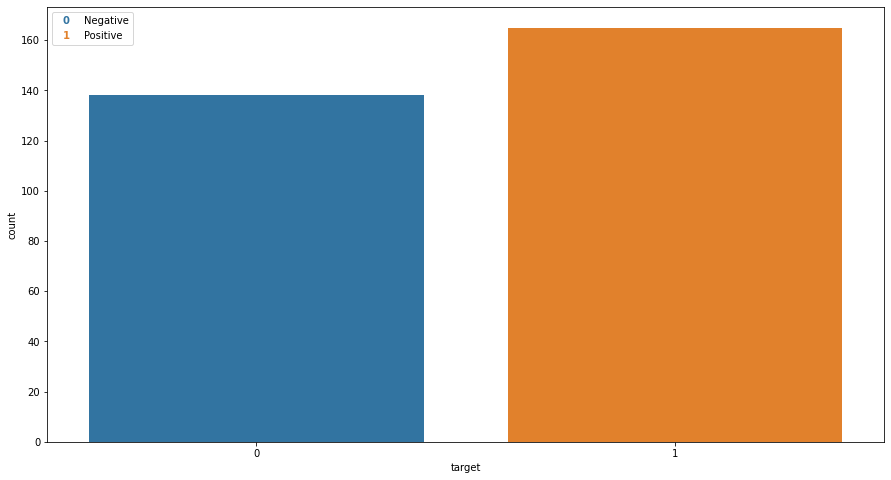

In [11]:
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

## Bar plot for Column diagnosis
sns.set_style()
plt.figure(figsize=(15,8))
ax=sns.countplot(x='target',data=data)
textname= "0 1".split()
labels= "Negative Positive".split()
t = ax.get_xticklabels()
labeldic = dict(zip(textname, labels))
# print (labeldic)


labels = [labeldic[h.get_text()]  for h in t]
# print (labels)
# handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
handles_list=[]
for h,c in zip(t,ax.patches):
    handles = h.get_text(),c.get_fc()
    handles_list.append(handles)

print (handles_list)

ax.legend(handles_list, labels, handler_map={tuple : TextHandler()}) 
plt.show()

In [12]:
## creating training and test data set
x = data_copy.drop(columns= 'target')
print (x.head())
x.shape
print ('*'*4)
y= data['target']
print (y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
****
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [13]:
#scaling the values using Standard Scalar Library
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print (pd.DataFrame(x, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']).head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  


In [14]:
#Spliting test datase as 30%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) 
print ('x_train:',len(x_train))
print ('x_test:',len(x_test))
print ('y_train:',len(y_train))
print ('y_test:',len(y_test))

x_train: 212
x_test: 91
y_train: 212
y_test: 91


[0.7370129870129871, 0.7878787878787878, 0.8064935064935064, 0.8303030303030303, 0.8305194805194805, 0.8443722943722942, 0.8396103896103895, 0.8350649350649351, 0.8253246753246752, 0.8350649350649351, 0.8259740259740258, 0.8257575757575758, 0.8164502164502163, 0.8305194805194805, 0.8257575757575758]
The maximum cross validation score is 0.8443722943722942 at K = 11
The minimum error rate is 0.15562770562770578 at K = 11


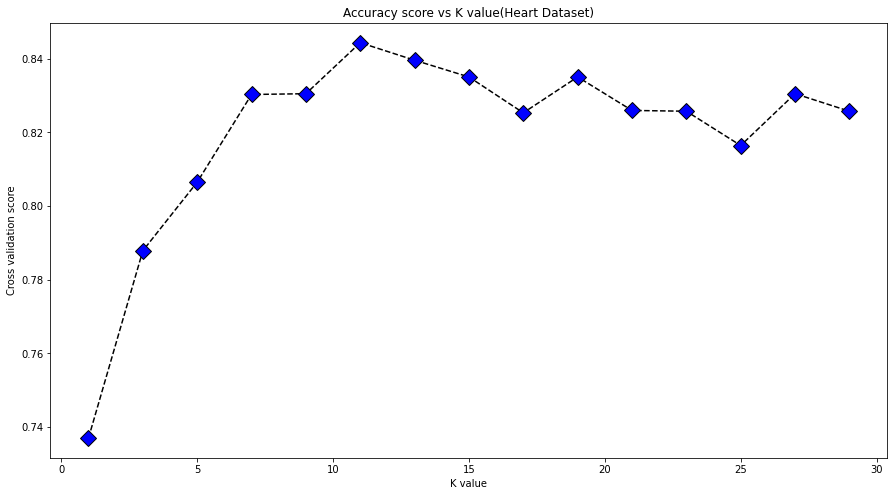

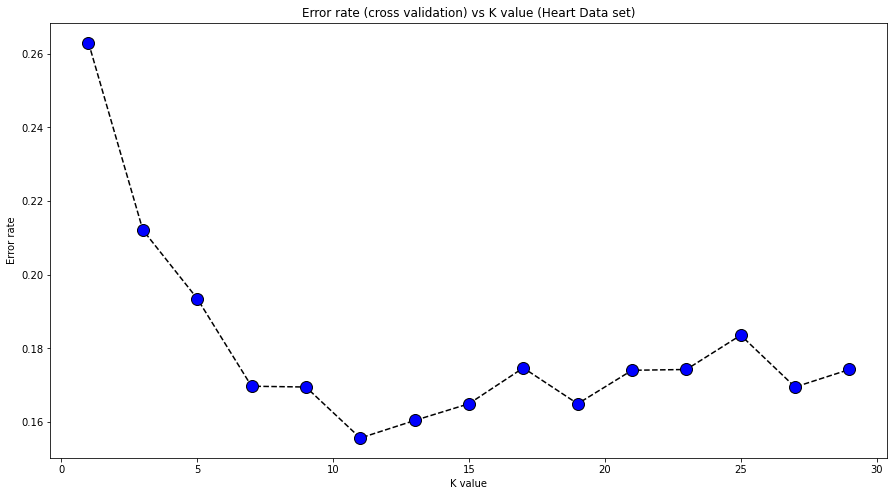

In [15]:
## KNN cross validation for K value
For_graph={}
cross_valscores_list=[]
error_rate_list = []
k_number=[]
for i in range(1,30,2):
    
    knn=KNeighborsClassifier(n_neighbors=i, weights= 'uniform', algorithm = 'auto')
    cross_val= cross_val_score(knn, x_train, y_train, cv=10, scoring = 'accuracy')
    cross_valscores_list.append(cross_val.mean())
    error_rate_list.append(1-cross_val.mean())
    cross_valscores_dictdata= (i,cross_val.mean(),1-cross_val.mean(),'Heart')
    k_number.append(i)
    For_graph.setdefault('Heart', []).append(cross_valscores_dictdata)



print (cross_valscores_list)

plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), cross_valscores_list, color = 'black', linestyle='dashed', marker = 'D', markerfacecolor = 'blue', markersize = 12)

plt.title('Accuracy score vs K value(Heart Dataset)')
plt.xlabel('K value')
plt.ylabel('Cross validation score')

print ("The maximum cross validation score is {} at K = {}".format(max(cross_valscores_list), k_number[cross_valscores_list.index(max(cross_valscores_list))]))


plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), error_rate_list, color = 'black', linestyle='dashed', marker = 'o', markerfacecolor = 'blue', markersize = 12)

plt.title('Error rate (cross validation) vs K value (Heart Data set)')
plt.xlabel('K value')
plt.ylabel('Error rate')

print ("The minimum error rate is {} at K = {}".format(min(error_rate_list), k_number[error_rate_list.index(min(error_rate_list))]))
heart_df=pd.DataFrame(For_graph)
#Diabetes_df
#Diabetes_df.to_excel('Diabetes_df.xlsx')
heart_df.to_excel("heart_df.xlsx",sheet_name='Sheet_name_1')  


uniform
The selected optimum K value is: 11
[[32 12]
 [ 3 44]]


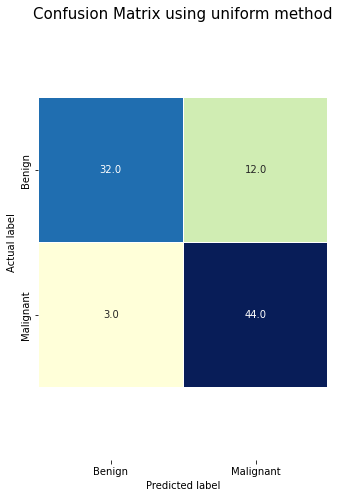

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.79      0.94      0.85        47

    accuracy                           0.84        91
   macro avg       0.85      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91

****
distance
The selected optimum K value is: 11
[[32 12]
 [ 3 44]]


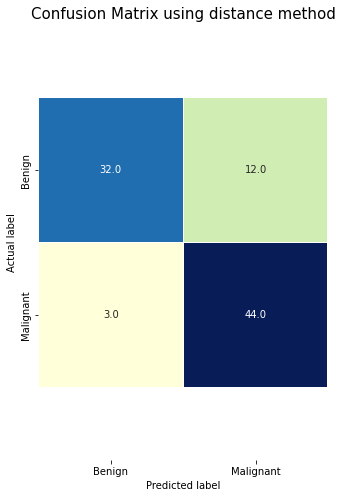

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.79      0.94      0.85        47

    accuracy                           0.84        91
   macro avg       0.85      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91

****


In [17]:
for weights in ["uniform", "distance"]:
    print (weights)
    selected_k= k_number[error_rate_list.index(min(error_rate_list))]
    print ('The selected optimum K value is:',selected_k)
    knn_neighnour=KNeighborsClassifier(n_neighbors=selected_k, weights= weights, algorithm = 'auto')
    knn_neighnour.fit(x_train, y_train)
    y_predict = knn_neighnour.predict(x_test)
    print(confusion_matrix(y_test,y_predict))
    cm= confusion_matrix(y_test,y_predict)
    df = pd.DataFrame(cm, index= ['Benign', 'Malignant'], columns = ['Benign', 'Malignant'])
    
    plt.figure(figsize=(15,8))
    sns.heatmap(df, annot = True, cbar = False, fmt = '.1f', linewidths = .3, square = True, cmap='YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title('Confusion Matrix using {} method'.format(weights), size = 15 );
    b,t = plt.ylim()
    b += 0.5
    t-= 0.5
    plt.ylim(b,t)
    plt.show()
    
    
    
    print(classification_report(y_test,y_predict))  
    print ('*'*4)